Importing necessary Libraries

In [248]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns #importing seaborn for statistical plots

#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

# for Logistic regression
from sklearn.linear_model import LogisticRegression

# for KNN model
from sklearn.neighbors import KNeighborsClassifier

# for Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

Load & review data

In [249]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


**To study the Data Distribution in each attribute**

In [250]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


ID column is not needed as data is mapped 1 to 1.
Age shows min of 23yrs & max of 67yrs with mean of 45.33yr
Experience has Negative values, which need to be handled or replaced with 0.
ZIP code is not required, so can be removed from Dataframe.
Values like Education, Personal Loan, Securities Account, CD Account, Online, CreditCard are Categorical information & need to be handled with datatype as Category.

In [251]:
bankdata = df.drop(['ID','ZIP Code'], axis = 1) # to drop ID & ZIP Code
bankdata.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [252]:
bankdata.shape # Check number of columns and rows in data frame

(5000, 12)

In [253]:
bankdata.head() # To check first 5 rows of data set, without ID & ZIP Code

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [254]:
bankdata.isnull().values.any() # To check if there are any null values in data set, False means, no Null values in data.

False

In [255]:
bankdata['Experience'].unique() # To see unique negative values in Experience column

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

In [256]:
# To replace negative Experience values with 0, as logically experience cannot be negative
bankdata['Experience'] = bankdata['Experience'].replace([-3, -2, -1],0)

In [257]:
bankdata['Experience'].unique() # To check if negative values are replaced with 0

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22,  0, 34, 38, 40, 33,  4, 42, 43], dtype=int64)

In [258]:
bankdata.dtypes # To check datatype of each attribute

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

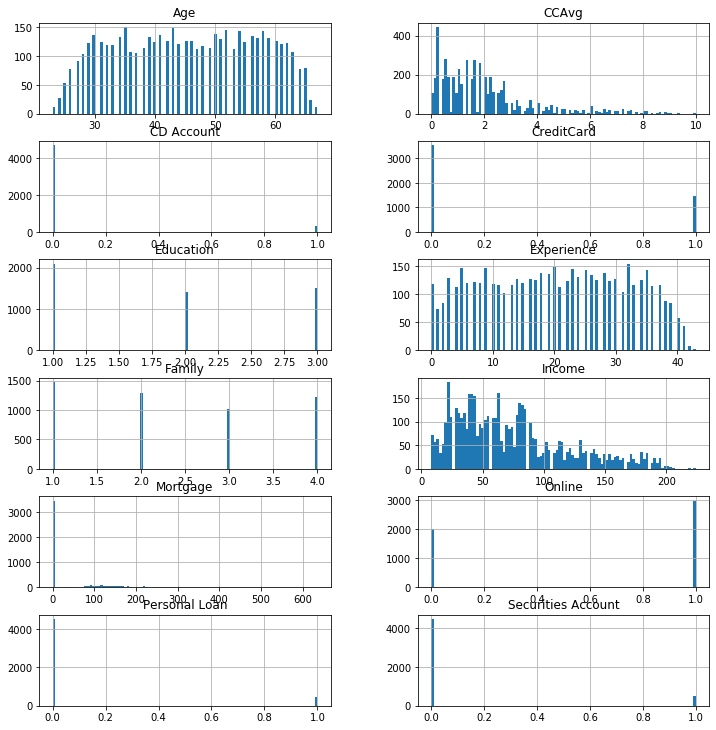

In [259]:
columns = list(bankdata) # Excluding Outcome column  
bankdata[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 
# To see Histogram of all individual data columns

In [260]:
bankdata.corr() # It will show correlation matrix between all attributes

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994198,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994198,1.000000,-0.046729,-0.052213,-0.049912,0.013536,-0.010840,-0.007858,-0.001111,0.010046,0.013975,0.008910
Income,-0.055269,-0.046729,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052213,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.049912,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013536,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010840,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007858,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001111,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010046,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


In [261]:
# To see correlation in graphical representation, below is function for that
def plot_corr(df, size=20):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

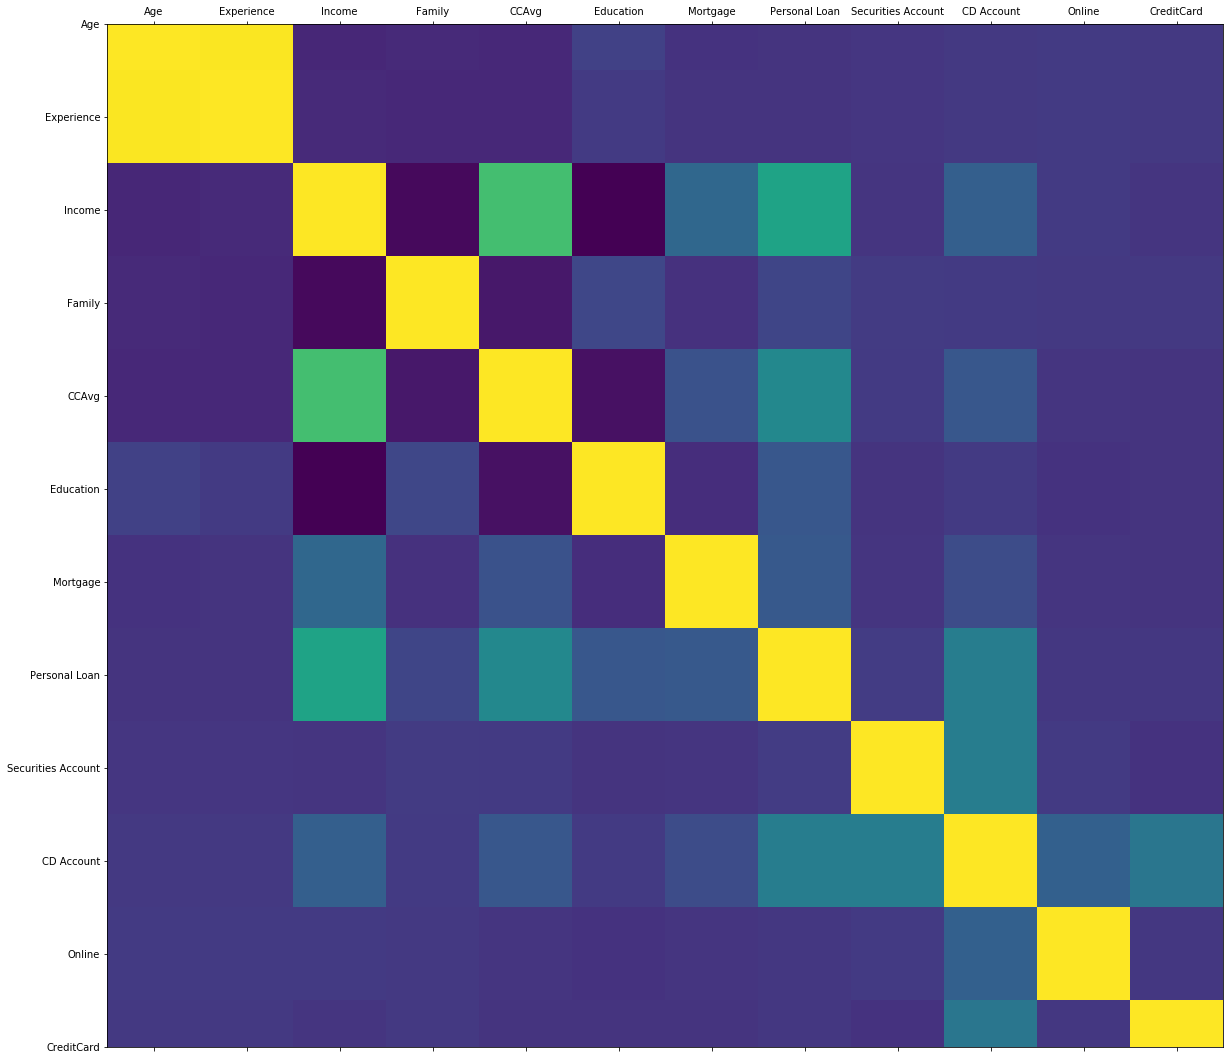

In [262]:
plot_corr(bankdata)

In above plot yellow colour represents maximum correlation and blue colour represents minimum correlation. We can see none of variable have correlation with any other variables. Except Age and Experience.

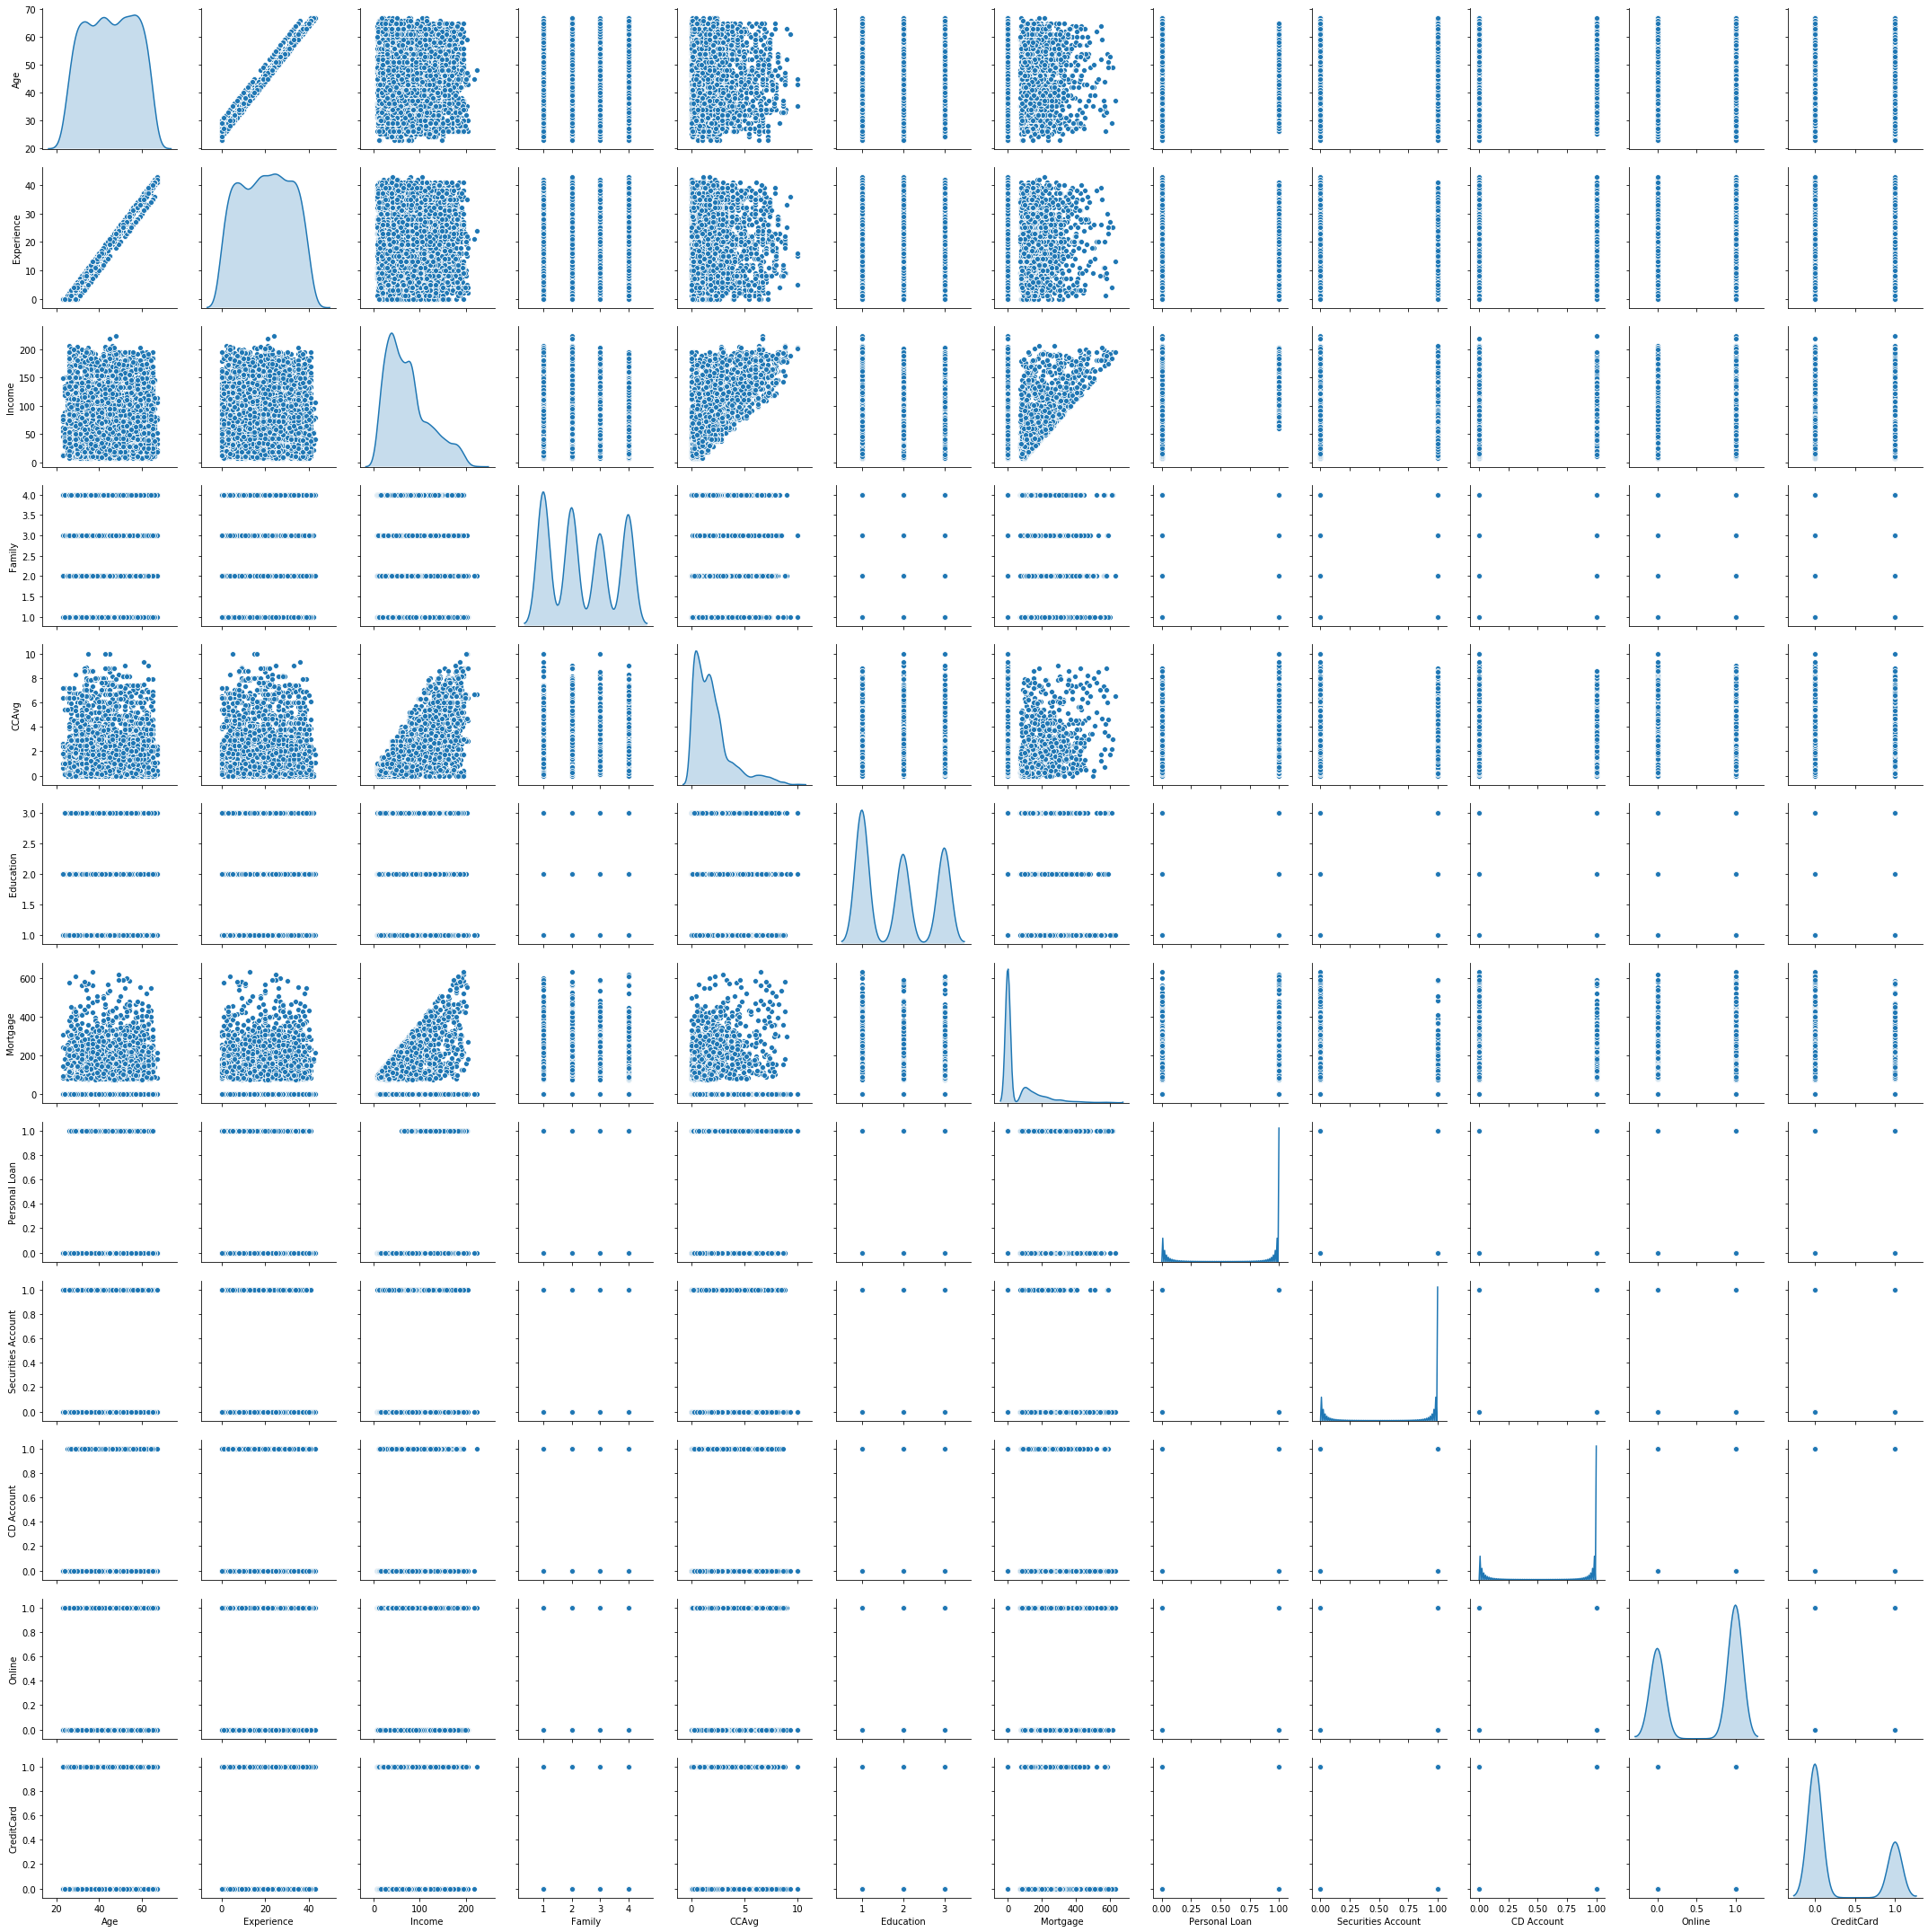

In [263]:
sns.pairplot(bankdata,diag_kind='kde')

In [264]:
# Let us look at the target column which is 'Personal Loan' to understand how the data is distributed amongst the various values
bankdata.groupby(["Personal Loan"]).mean()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,
0,45.367257,20.148894,66.237389,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,45.066667,19.843750,144.745833,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


In [265]:
#Convert X & Y variable to a categorical variable as relevant
bankdata['Personal Loan'] = bankdata['Personal Loan'].astype('category')
bankdata['Education'] = bankdata['Education'].astype('category')
bankdata['Securities Account'] = bankdata['Securities Account'].astype('category')
bankdata['CD Account'] = bankdata['CD Account'].astype('category')
bankdata['Online'] = bankdata['Online'].astype('category')
bankdata['CreditCard'] = bankdata['CreditCard'].astype('category')

In [266]:
bankdata.info() # This is the target column distribution, wherein all the datatypes have been handled as per requirement.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null category
Mortgage              5000 non-null int64
Personal Loan         5000 non-null category
Securities Account    5000 non-null category
CD Account            5000 non-null category
Online                5000 non-null category
CreditCard            5000 non-null category
dtypes: category(6), float64(1), int64(5)
memory usage: 264.4 KB


In [267]:
#Calculate baseline proportion - ratio of Yes to No to identify data imbalance
prop_Y = bankdata['Personal Loan'].value_counts(normalize=True)
print(prop_Y)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64


**There is a lot of imbalance in the data**

In [268]:
# Define X and Y variables, Personal Loan is our Target Attribute, so same is dropped from X
X = bankdata.drop('Personal Loan', axis=1)
Y = bankdata['Personal Loan']

In [269]:
# To Split into training and test set in ratio of 70:30, Random state has been set to 1 for repeatability in results
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
x_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,47,22,35,2,1.3,1,0,0,0,1,0
4768,38,14,39,1,2.0,2,0,0,0,1,0
65,59,35,131,1,3.8,1,0,0,0,1,1
177,29,3,65,4,1.8,2,244,0,0,0,0
4489,39,13,21,3,0.2,2,0,0,0,1,0


Lets check split of data

In [270]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(bankdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(bankdata.index)) * 100))

70.00% data is in training set
30.00% data is in test set


Now lets check Personal Loan True/False ratio in split data

In [271]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(bankdata.loc[bankdata['Personal Loan'] == 1]), (len(bankdata.loc[bankdata['Personal Loan'] == 1])/len(bankdata.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(bankdata.loc[bankdata['Personal Loan'] == 0]), (len(bankdata.loc[bankdata['Personal Loan'] == 0])/len(bankdata.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 331 (9.46%)
Training Personal Loan False Values   : 3169 (90.54%)

Test Personal Loan True Values        : 149 (9.93%)
Test Personal Loan False Values       : 1351 (90.07%)



**LOGISTIC REGRESSION MODEL**

In [272]:
#Build the logistic regression model
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)

#predict on test
y_predict = model.predict(x_test)
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.399775  0.399195  0.048907  0.644518  0.162338  1.640048  0.000788   

          7         8         9        10  intercept  
0 -0.860433  3.212828 -0.571611 -0.989473  -2.489081  


In [273]:
#logisticRegr.fit(x_train, y_train)
model_score = model.score(x_test, y_test)
print(model_score)

0.946


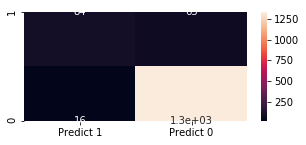

In [274]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (5,2))
sns.heatmap(df_cm, annot=True)

In [275]:
cm

array([[  84,   65],
       [  16, 1335]], dtype=int64)

The confusion matrix

True Positives (TP): we correctly predicted people with Personal Loan: 84

True Negatives (TN): we correctly predicted people without Personal Loan: 1335

False Positives (FP): we incorrectly predicted people who have Personal Loan (a "Type I error"): 16 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted people who do not have Personal Loan (a "Type II error"): 65 Falsely predict negative Type II error

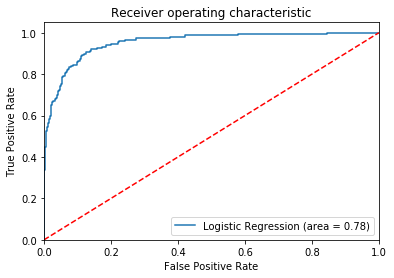

In [276]:
#AUC ROC curve
logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The ROC curve has better True Positive rate than False Positive Rate

In [277]:
auc_score = metrics.roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
round( float( auc_score ), 2 )

0.95

# Build KNN model

In [278]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [279]:
# Call Nearest Neighbour algorithm

NNH.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

**Evaluate Performance of kNN Model**

In [280]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(x_test)
NNH.score(x_test, y_test)

0.9093333333333333

Confusion Matrix


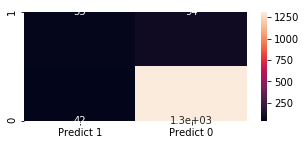

In [281]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in [1,0]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (5,2))
sns.heatmap(df_cm, annot=True)

In [282]:
cm

array([[  55,   94],
       [  42, 1309]], dtype=int64)

In [283]:
# cross validation
#Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from the above list using the Mis 
#classification error

In [1]:
# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [285]:
# evaluate accuracy
print(accuracy_score(y_test, y_pred))

0.8746666666666667


In [286]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    # predict the response
    y_pred = knn.predict(x_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 9


In [287]:
#Plot misclassification error vs k (with k value on X-axis) using matplotlib.

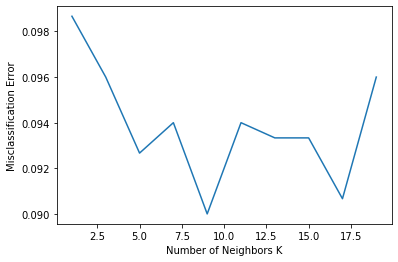

In [288]:
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [289]:
#Use k=9 as the final model for prediction
knn = KNeighborsClassifier(n_neighbors = 9)

# fitting the model
knn.fit(x_train, y_train)

# predict the response
y_pred = knn.predict(x_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.91
0.33557046979865773


**The final model has a good accuracy as well as recall score**

# Train Naive Bayes model

In [290]:
# create the model
NBmodel = GaussianNB()

NBmodel.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Now GaussianNB classifier is built. The classifier is trained using training data. We can use fit() method for training it. 
After building a classifier, our model is ready to make predictions. We can use predict() method with test set features as its 
parameters.

In [291]:
y_pred = NBmodel.predict(x_test)

In [292]:
#Accuracy of our Gaussian Naive Bayes model
accuracy_score(y_test, y_pred, normalize = True)

0.8746666666666667

Confusion Matrix


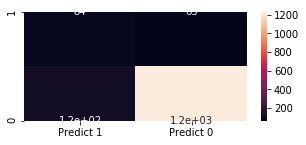

In [293]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in [1,0]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (5,2))
sns.heatmap(df_cm, annot=True)

In [294]:
cm

array([[  84,   65],
       [ 123, 1228]], dtype=int64)

# Conclusion:

After comparing the outputs generated by all the 3 models, the Accuracy given are as follows:

Logistic Regression - 94.6%  (Sum of FP+FN = 81)

KNN                 - 91%    (Sum of FP+FN = 136)

NB                  - 87.46% (Sum of FP+FN = 188)

Hence Logistic Regression is the best model for this case & it performs better than others as above accuracy & respective findings from Confusion Matrix.